In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Pre-trained network

In [2]:
# load up general network training results
with open('general/results.pkl', 'rb') as f:
    general = pickle.load(f)

In [3]:
list(general['subtask_losses'])

[0, 1, 2, 3]

In [4]:
general['codes']

[[0], [1], [2], [0, 1, 2]]

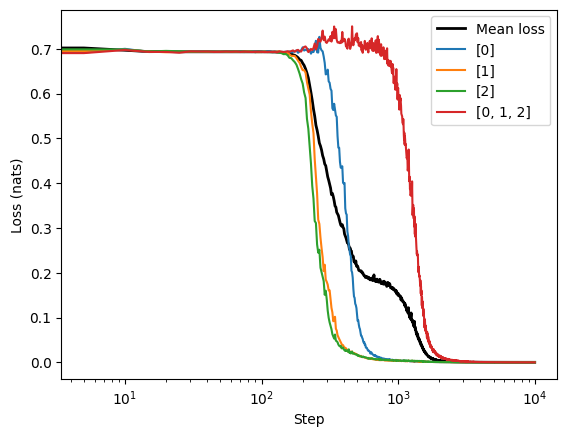

In [5]:
plt.plot(general['steps'], general['losses'], color='black', label='Mean loss', linewidth=2)

for i in range(len(general['codes'])):
    code = general['codes'][i]
    plt.plot(general['steps'], general['subtask_losses'][i], label=f'{code}')

plt.xlabel('Step')
plt.ylabel('Loss (nats)')
plt.xscale('log')
plt.legend()

## Prune-tuned network

In [6]:
with open('pruning/results.pkl', 'rb') as f:
    pruning = pickle.load(f)

Text(0, 0.5, 'Sparsity loss')

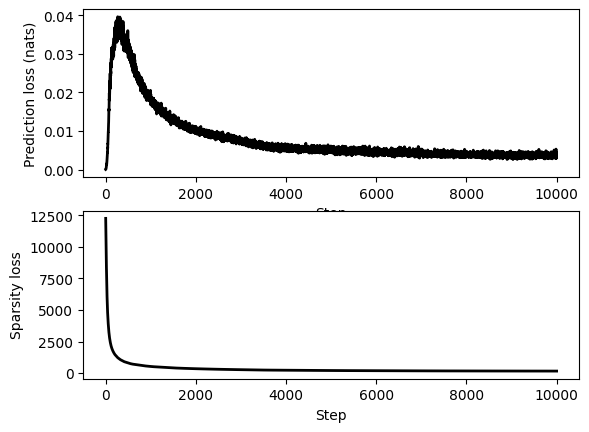

In [7]:
plt.subplot(2, 1, 1)
plt.plot(pruning['steps'], pruning['pred_losses'], color='black', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Prediction loss (nats)')

plt.subplot(2, 1, 2)
plt.plot(pruning['steps'], pruning['sparsity_losses'], color='black', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Sparsity loss')


In [8]:
widths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
fromscratch = {}
for width in widths:
    with open(f'fromscratch/results-width{width:04d}.pkl', 'rb') as f:
        fromscratch[width] = pickle.load(f)

Text(0, 0.5, 'Loss (nats)')

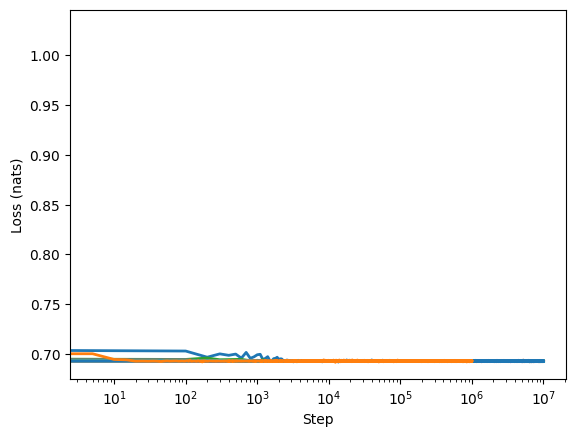

In [9]:
for width in widths:
    plt.plot(fromscratch[width]['steps'], fromscratch[width]['losses'], label=f'{width}', linewidth=2)
plt.xscale('log')
plt.xlabel('Step')
plt.ylabel('Loss (nats)')